In [27]:
# Importando librerias para el proceso 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualisation
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError


from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from keras.callbacks import EarlyStopping
from keras import regularizers

In [5]:
data = pd.read_csv('trainReg.csv')
data.describe()

,ID,Y,V1,V2,V3,V4,V5,V6,V7,V8,...,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90
count,77779.000000,77779.000000,77779.000000,77779.000000,77779.0,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,...,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000
mean,48244.238342,2002.308129,43.425185,-0.136720,0.0,3.755313,-2.339768,-1.643095,-6.814997,-9.587264,...,15.717215,-71.733008,41.679287,37.816353,0.328213,17.575097,-25.628857,4.463484,18.664885,1.240194
std,27846.283673,10.811038,6.128869,4.370466,0.0,17.609183,14.483975,7.898574,22.980515,12.911914,...,32.211995,176.893351,123.523393,95.335357,16.272689,115.243644,173.310304,13.526414,186.690183,22.379654
min,1.000000,1926.000000,4.836880,-69.680870,0.0,-165.221610,-121.475340,-72.503850,-152.407550,-70.693420,...,-424.517570,-4402.376440,-1733.722110,-1848.702260,-238.386730,-3168.924570,-4319.992320,-236.039260,-7458.378150,-281.150600
25%,24079.500000,1998.000000,40.060315,-2.612435,0.0,-7.016240,-10.685075,-6.300690,-21.265305,-18.583065,...,-1.968265,-136.511095,-21.467975,-4.604295,-6.702370,-31.569390,-100.668480,-2.569360,-60.121980,-8.900120
50%,48357.000000,2006.000000,44.323850,-0.063000,0.0,2.022100,-2.054560,-1.586240,-6.307610,-11.238330,...,9.079980,-51.322570,28.217560,33.417370,0.788980,15.237360,-21.581640,3.136900,5.941490,-0.095340
75%,72340.500000,2010.000000,47.900080,2.465950,0.0,12.776450,6.423900,3.077055,7.617995,-2.329330,...,26.211700,13.999870,89.190475,77.216175,8.354270,67.361475,51.333150,10.002145,84.389125,9.520700
max,96435.000000,2014.000000,60.034010,23.815260,0.0,274.658580,160.815220,68.447960,262.068870,112.971410,...,840.973380,2147.942140,3210.701700,1482.642140,199.121500,2144.103910,2833.608950,275.353660,5289.111380,600.766240


In [6]:
data.columns

Index(['ID', 'Y', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
       'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
       'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60',
       'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70',
       'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80',
       'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90'],
      dtype='object')

In [7]:
nsongs = {}
anios_datos = 0
for y in range(1926,2014):
    if len(data[data.Y==y])!= 0 :
        nsongs[y] = len(data[data.Y==y])
        print ("Year=%d, nsongs=%d" % (y, nsongs[y]))
        anios_datos+=1
print('Años con informaicón:', anios_datos)


Year=1926, nsongs=1
Year=1932, nsongs=7
Year=1933, nsongs=18
Year=1934, nsongs=1
Year=1935, nsongs=20
Year=1943, nsongs=1
Year=1944, nsongs=1
Year=1946, nsongs=1
Year=1948, nsongs=2
Year=1949, nsongs=8
Year=1950, nsongs=1
Year=1951, nsongs=8
Year=1952, nsongs=5
Year=1953, nsongs=14
Year=1954, nsongs=7
Year=1956, nsongs=11
Year=1957, nsongs=15
Year=1958, nsongs=14
Year=1959, nsongs=51
Year=1960, nsongs=106
Year=1961, nsongs=105
Year=1962, nsongs=109
Year=1963, nsongs=58
Year=1964, nsongs=99
Year=1965, nsongs=55
Year=1966, nsongs=103
Year=1967, nsongs=158
Year=1968, nsongs=145
Year=1969, nsongs=164
Year=1970, nsongs=228
Year=1971, nsongs=248
Year=1972, nsongs=327
Year=1973, nsongs=301
Year=1974, nsongs=253
Year=1975, nsongs=281
Year=1976, nsongs=310
Year=1977, nsongs=376
Year=1978, nsongs=264
Year=1979, nsongs=379
Year=1980, nsongs=362
Year=1981, nsongs=411
Year=1982, nsongs=453
Year=1983, nsongs=537
Year=1984, nsongs=424
Year=1985, nsongs=494
Year=1986, nsongs=555
Year=1987, nsongs=618


Text(0, 0.5, 'Cantidad Canciones')

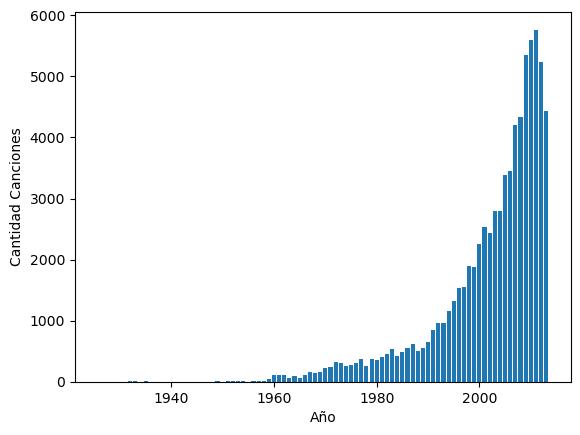

In [8]:
yrs = nsongs.keys()
values = [nsongs[y] for y in yrs]
plt.bar(yrs, values, align='center')
plt.xlabel("Año")
plt.ylabel("Cantidad Canciones")

In [9]:
data.corr

<bound method DataFrame.corr of           ID     Y        V1       V2  V3        V4        V5       V6  \
0          1  2013  44.81144  0.83826   0   7.91314  10.94148 -0.04547   
1          2  1998  41.99180  7.99976   0  64.26707  16.54115 -9.28737   
2          3  1998  42.19196  2.23111   0  65.07719  24.99746  1.76100   
3          4  1998  39.28634 -1.85716   0  91.04190   9.08333  0.08502   
4          5  1998  40.36025  2.94918   0  53.83723  13.71369 -8.21964   
...      ...   ...       ...      ...  ..       ...       ...      ...   
77774  96428  2004  33.76706 -3.80678   0  -1.44169  23.78801  5.01781   
77775  96432  2004  25.77805  2.41861   0   5.96418  -8.43658 -1.36182   
77776  96433  2004  24.78656  1.36415   0  34.13329  34.32996 -0.95170   
77777  96434  2006  39.67698  3.65167   0  34.04925  -0.68467 -2.13911   
77778  96435  2006  44.44499  8.89481   0  48.99411  15.83343  5.00566   

             V7        V8  ...       V81        V82        V83        V84  \
0 

In [10]:
# Dividir los datos en características (X) y etiquetas (Y)
X = data.drop(['ID', 'Y', 'V3'], axis=1)
Y = data['Y']


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



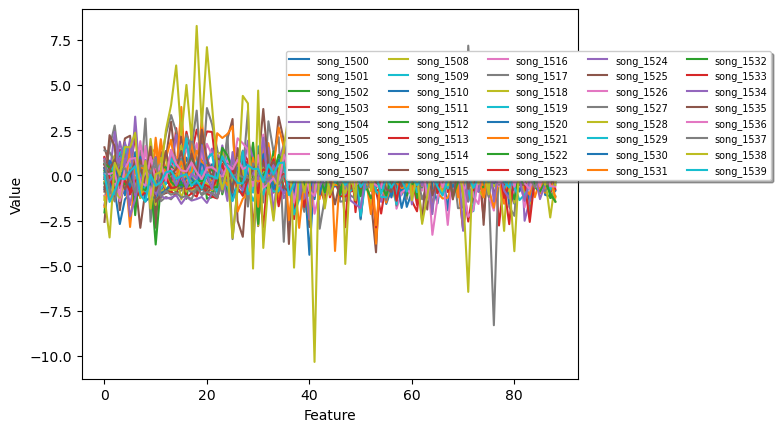

In [12]:
for i in range(1500, 1540):
    plt.plot(X_train[i], label='song_' + str(i))
    
plt.xlabel("Feature")
plt.ylabel("Value")
plt.legend(loc='upper center', bbox_to_anchor=(0.9, 0.9), ncol=5, fancybox=True, shadow=True, fontsize=7)

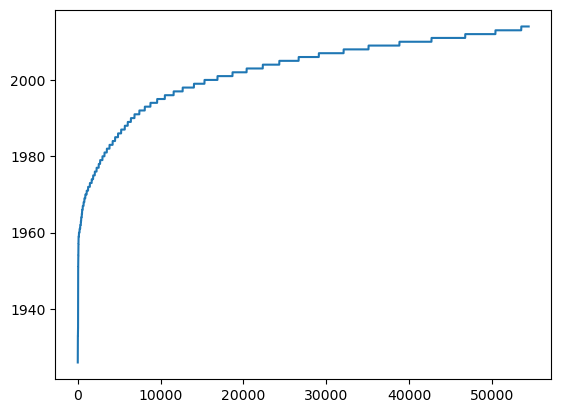

In [13]:
plt.plot(sorted(Y_train))

In [142]:
# Selección de características
selector = SelectKBest(score_func=f_classif, k=5)
X_train = selector.fit_transform(X_train, Y_train)
X_test = selector.transform(X_test)







In [28]:
from sklearn.linear_model import ElasticNetCV

def SelectFeatures(DataTrainX, DataTrainY, DataTestX, NumFeatures):
    selector = SelectKBest(score_func=f_regression, k=NumFeatures)
    DataTrainXBest = selector.fit_transform(DataTrainX, DataTrainY)
    DataTestXBest = selector.transform(DataTestX)

    return DataTrainXBest, DataTestXBest
    
def SelectFeaturesNew(DataTrainX, DataTrainY, DataTestX, NumFeatures):
    # Elastic Net para seleccionar características

    model_enet = ElasticNetCV(cv=5, random_state=0, l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=np.logspace(-4, -0.5, 30))
    model_enet.fit(DataTrainX, DataTrainY)

    # Importancia de las características y selección
    importance = np.abs(model_enet.coef_)
    selected_features = importance > np.sort(importance)[::-1][NumFeatures]  # seleccionar las 60 características más importantes
    DataTrainXBest = DataTrainX[:, selected_features]
    DataTestXBest = DataTestX[:, selected_features]

    return DataTrainXBest, DataTestXBest




A , B = SelectFeaturesNew(X_train, Y_train, X_test, 10)

#XTrainBest, XTestBest = SelectFeatures(X_train, Y_train, X_test, 9)




In [177]:
A, B

(array([[ 0.12097882,  0.23725603,  1.00644714, ...,  1.68246147,
          1.45789181, -0.83860781],
        [ 0.3739847 ,  0.01249786, -1.05365132, ..., -1.08503451,
         -0.92035374,  0.36427129],
        [ 0.12737473,  1.41005323,  0.30540424, ..., -0.34607582,
         -0.62705045,  0.75943067],
        ...,
        [-1.4755125 , -0.50880072,  1.47675387, ..., -0.63185429,
         -0.06111901,  0.25807841],
        [-0.19984394, -1.34794821,  0.30730735, ...,  0.66211631,
          0.39795757, -0.0072767 ],
        [ 0.08458943, -1.36081553,  0.13075986, ..., -0.11621126,
         -0.05299593, -0.36676057]]),
 array([[ 1.32213896,  0.28842805, -1.01069134, ..., -0.59345968,
         -0.16071146, -0.55934228],
        [ 0.95436114, -0.97396858, -0.25851138, ..., -0.21563507,
         -0.54292641, -0.03284709],
        [-0.72744108,  0.56751561,  1.95643253, ...,  1.40973631,
          1.82098233, -0.9276166 ],
        ...,
        [-0.60017458, -0.76685049,  0.0296613 , ..., -

In [66]:
# Crear la red neuronal
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam',  metrics=[RootMeanSquaredError()])

# Implementar early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

# Entrenar el modelo
model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1, callbacks=[es])

# Evaluar el modelo
model.evaluate(X_test, Y_test, verbose=1)


Epoch 1/100
1362/1362 [==============================] - 4s 2ms/step - loss: 1985127.0000 - root_mean_squared_error: 1408.9453 - val_loss: 384991.3750 - val_root_mean_squared_error: 620.4767
Epoch 2/100
1362/1362 [==============================] - 2s 2ms/step - loss: 196634.8438 - root_mean_squared_error: 443.4353 - val_loss: 91943.0078 - val_root_mean_squared_error: 303.2211
Epoch 3/100
1362/1362 [==============================] - 3s 2ms/step - loss: 44632.3398 - root_mean_squared_error: 211.2637 - val_loss: 22584.2656 - val_root_mean_squared_error: 150.2806
Epoch 4/100
1362/1362 [==============================] - 3s 2ms/step - loss: 11419.2148 - root_mean_squared_error: 106.8607 - val_loss: 7123.7769 - val_root_mean_squared_error: 84.4025
Epoch 5/100
1362/1362 [==============================] - 2s 2ms/step - loss: 3564.4209 - root_mean_squared_error: 59.7028 - val_loss: 2707.1458 - val_root_mean_squared_error: 52.0302
Epoch 6/100
1362/1362 [==============================] - 3s 2ms/st

[118.74050903320312, 10.896811485290527]

In [96]:
# Define Reunoral network
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))


# Compile the model
model.compile(loss=MeanSquaredError(), optimizer='RMSprop', metrics=[RootMeanSquaredError()])

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=20, validation_split=0.2)


# Evaluate the model
resultado = model.evaluate(X_test, Y_test, return_dict=True)

Epoch 1/10
2178/2178 [==============================] - 3s 1ms/step - loss: 609056.1875 - root_mean_squared_error: 780.4205 - val_loss: 2245.5103 - val_root_mean_squared_error: 47.3868
Epoch 2/10
2178/2178 [==============================] - 2s 1ms/step - loss: 450.3275 - root_mean_squared_error: 21.2209 - val_loss: 272.8729 - val_root_mean_squared_error: 16.5189
Epoch 3/10
2178/2178 [==============================] - 2s 1ms/step - loss: 176.8338 - root_mean_squared_error: 13.2979 - val_loss: 192.8914 - val_root_mean_squared_error: 13.8885
Epoch 4/10
2178/2178 [==============================] - 2s 1ms/step - loss: 158.1266 - root_mean_squared_error: 12.5748 - val_loss: 444.3452 - val_root_mean_squared_error: 21.0795
Epoch 5/10
2178/2178 [==============================] - 2s 1ms/step - loss: 153.9987 - root_mean_squared_error: 12.4096 - val_loss: 126.6771 - val_root_mean_squared_error: 11.2551
Epoch 6/10
2178/2178 [==============================] - 2s 1ms/step - loss: 150.1474 - root_mea

In [103]:
resultado.get('root_mean_squared_error')

14.016508102416992

In [42]:
# Define Reunoral network
# Implementar early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

def optimizar(epocas, optimizador, batch_sz):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))


    # Compile the model
    model.compile(loss=MeanSquaredError(), optimizer=optimizador, metrics=[RootMeanSquaredError()])

    # Train the model
    model.fit(X_train, Y_train, epochs=epocas, batch_size=batch_sz, validation_split=0.2, verbose=1, callbacks=[es])


    # Evaluate the model
    resultado = model.evaluate(X_test, Y_test, return_dict=True)

    return epocas, optimizador, resultado.get('root_mean_squared_error'), batch_sz



def OptimizedModel(epocas, optimizador, batch_sz, XTrain, YTrain, XTest, YTest, NumFeatures):

    XTrainBest, XTestBest = SelectFeatures(XTrain, YTrain, XTest, NumFeatures)

    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(XTrainBest.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))


    # Compile the model
    model.compile(loss=MeanSquaredError(), optimizer=optimizador, metrics=[RootMeanSquaredError()])

    # Train the model
    model.fit(XTrainBest, YTrain, epochs=epocas, batch_size=batch_sz, validation_split=0.2, verbose=1, callbacks=[es])


    # Evaluate the model
    resultado = model.evaluate(XTestBest, YTest, return_dict=True)

    return epocas, optimizador, resultado.get('root_mean_squared_error'), batch_sz, NumFeatures


def OptimizedModelNew(epocas, optimizador, batch_sz, XTrain, YTrain, XTest, YTest, NumFeatures):

    XTrainBest, XTestBest = SelectFeaturesNew(XTrain, YTrain, XTest, NumFeatures)

    model = Sequential()
    model.add(Dense(502, activation='elu', input_shape=(XTrainBest.shape[1],)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='elu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='elu'))
    model.add(Dense(1, activation='linear'))


    # Compile the model
    model.compile(loss=MeanSquaredError(), optimizer=optimizador, metrics=[RootMeanSquaredError()])

    # Train the model
    model.fit(XTrainBest, YTrain, epochs=epocas, batch_size=batch_sz, validation_split=0.2, verbose=1, callbacks=[es])


    # Evaluate the model
    resultado = model.evaluate(XTestBest, YTest, return_dict=True)

    return epocas, optimizador, resultado.get('root_mean_squared_error'), batch_sz, NumFeatures

    

In [39]:
resultado = list()

epocas = [10,50, 100]
optimizador= ['RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
batch_size = [10, 20, 30, 40]


for o in optimizador:
    for e in epocas:
        for b in batch_size:
            ret = optimizar(e, o, b)
            resultado.append([ret])


Epoch 1/10
4356/4356 ━━━━━━━━━━━━━━━━━━━━ 5s 954us/step - loss: 1056788.7500 - root_mean_squared_error: 957.2991 - val_loss: 16311.5879 - val_root_mean_squared_error: 127.7168
Epoch 2/10
4356/4356 ━━━━━━━━━━━━━━━━━━━━ 4s 848us/step - loss: 6330.0391 - root_mean_squared_error: 78.5146 - val_loss: 1729.9967 - val_root_mean_squared_error: 41.5932
Epoch 2: early stopping
730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - loss: 1371.4276 - root_mean_squared_error: 36.8117
Epoch 1/10
2178/2178 ━━━━━━━━━━━━━━━━━━━━ 3s 919us/step - loss: 1412681.3750 - root_mean_squared_error: 1129.9498 - val_loss: 47952.9141 - val_root_mean_squared_error: 218.9815
Epoch 2/10
2178/2178 ━━━━━━━━━━━━━━━━━━━━ 2s 952us/step - loss: 24880.1875 - root_mean_squared_error: 155.5961 - val_loss: 4476.3413 - val_root_mean_squared_error: 66.9055
Epoch 2: early stopping
730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4095.3752 - root_mean_squared_error: 63.7982
Epoch 1/10
1452/1452 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 18585

In [40]:
resultado

[[(10, 'RMSprop', 43.25630569458008, 10)],
 [(10, 'RMSprop', 71.13365936279297, 20)],
 [(10, 'RMSprop', 133.5719757080078, 30)],
 [(10, 'RMSprop', 185.79653930664062, 40)],
 [(50, 'RMSprop', 41.98870849609375, 10)],
 [(50, 'RMSprop', 76.00767517089844, 20)],
 [(50, 'RMSprop', 143.8264923095703, 30)],
 [(50, 'RMSprop', 188.70884704589844, 40)],
 [(100, 'RMSprop', 40.489166259765625, 10)],
 [(100, 'RMSprop', 73.53765106201172, 20)],
 [(100, 'RMSprop', 127.8882827758789, 30)],
 [(100, 'RMSprop', 200.74974060058594, 40)],
 [(10, 'Adagrad', 1452.9495849609375, 10)],
 [(10, 'Adagrad', 1741.35009765625, 20)],
 [(10, 'Adagrad', 1820.8883056640625, 30)],
 [(10, 'Adagrad', 1875.892822265625, 40)],
 [(50, 'Adagrad', 1394.345703125, 10)],
 [(50, 'Adagrad', 1673.46533203125, 20)],
 [(50, 'Adagrad', 1832.630126953125, 30)],
 [(50, 'Adagrad', 1845.435546875, 40)],
 [(100, 'Adagrad', 1593.1788330078125, 10)],
 [(100, 'Adagrad', 1702.7220458984375, 20)],
 [(100, 'Adagrad', 1846.1785888671875, 30)],
 [(

In [41]:
# Flatten the list of tuples
flattened_data = [item for sublist in resultado for item in sublist]

# Convert the flattened data into a DataFrame
df = pd.DataFrame(flattened_data, columns=['Epocas', 'Optimizador', 'RMSE', 'Batch Size'])

# Order the DataFrame by the third position (Value3) in ascending order
df_sorted = df.sort_values(by='RMSE', ascending=True)

df_sorted.head(10)

,Epocas,Optimizador,RMSE,Batch Size
8,100,RMSprop,40.489166,10
4,50,RMSprop,41.988708,10
0,10,RMSprop,43.256306,10
60,10,Nadam,47.710770,10
64,50,Nadam,54.763065,10
68,100,Nadam,57.952610,10
40,50,Adam,60.282028,10
36,10,Adam,61.608723,10
44,100,Adam,67.383713,10
1,10,RMSprop,71.133659,20


In [43]:
resultado_3 = list()

Epocas = [100]
Optimizador= ['Adam']
BatchSize = [32,64]
NumFeatures = [15,30,55,70,85]


for o in Optimizador:
    for e in Epocas:
        for b in BatchSize:
            for f in NumFeatures:
                ret = OptimizedModel(e, o, b, X_train, Y_train, X_test, Y_test, f)
                resultado_3.append([ret])




Epoch 1/100


c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1362/1362 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1946177.5000 - root_mean_squared_error: 1347.8530 - val_loss: 64484.8750 - val_root_mean_squared_error: 253.9387
Epoch 2/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 35342.3398 - root_mean_squared_error: 186.7898 - val_loss: 8503.5830 - val_root_mean_squared_error: 92.2149
Epoch 3/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 5138.5796 - root_mean_squared_error: 71.2305 - val_loss: 2118.6729 - val_root_mean_squared_error: 46.0290
Epoch 4/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1169.5790 - root_mean_squared_error: 34.1782 - val_loss: 795.4522 - val_root_mean_squared_error: 28.2038
Epoch 5/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 468.7122 - root_mean_squared_error: 21.6211 - val_loss: 402.5217 - val_root_mean_squared_error: 20.0629
Epoch 6/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 286.2067 - root_mean_squared_error: 16.7967 - val_loss: 252.5232 - val_root_mean_squared_error: 15

c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1362/1362 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1867865.8750 - root_mean_squared_error: 1317.6385 - val_loss: 116588.5000 - val_root_mean_squared_error: 341.4506
Epoch 2/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - loss: 64720.0977 - root_mean_squared_error: 253.4095 - val_loss: 26751.8535 - val_root_mean_squared_error: 163.5599
Epoch 3/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 13262.5068 - root_mean_squared_error: 114.3774 - val_loss: 7868.3105 - val_root_mean_squared_error: 88.7035
Epoch 4/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2592.0854 - root_mean_squared_error: 50.6629 - val_loss: 2666.6152 - val_root_mean_squared_error: 51.6393
Epoch 5/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 675.0848 - root_mean_squared_error: 25.9600 - val_loss: 1478.9532 - val_root_mean_squared_error: 38.4572
Epoch 6/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 283.2013 - root_mean_squared_error: 16.8121 - val_loss: 1068.9822 - val_root_mean_squared

c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1362/1362 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1882577.8750 - root_mean_squared_error: 1325.7657 - val_loss: 152496.3750 - val_root_mean_squared_error: 390.5078
Epoch 2/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 99868.1406 - root_mean_squared_error: 314.8739 - val_loss: 44311.0508 - val_root_mean_squared_error: 210.5019
Epoch 3/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 26000.3398 - root_mean_squared_error: 160.6302 - val_loss: 12685.2842 - val_root_mean_squared_error: 112.6290
Epoch 4/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 6636.7207 - root_mean_squared_error: 80.7714 - val_loss: 3475.3303 - val_root_mean_squared_error: 58.9519
Epoch 5/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1387.3912 - root_mean_squared_error: 37.1525 - val_loss: 1554.0121 - val_root_mean_squared_error: 39.4210
Epoch 6/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 456.8849 - root_mean_squared_error: 21.3566 - val_loss: 872.0863 - val_root_mean_squared

c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1362/1362 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1781756.8750 - root_mean_squared_error: 1286.1772 - val_loss: 151315.3906 - val_root_mean_squared_error: 388.9928
Epoch 2/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 102902.5547 - root_mean_squared_error: 319.6934 - val_loss: 47504.8438 - val_root_mean_squared_error: 217.9561
Epoch 3/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 28017.7207 - root_mean_squared_error: 166.8814 - val_loss: 14129.9619 - val_root_mean_squared_error: 118.8695
Epoch 4/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6192.8301 - root_mean_squared_error: 78.5451 - val_loss: 3949.7290 - val_root_mean_squared_error: 62.8469
Epoch 5/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1558.8027 - root_mean_squared_error: 39.3881 - val_loss: 1713.6746 - val_root_mean_squared_error: 41.3966
Epoch 6/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - loss: 516.9914 - root_mean_squared_error: 22.7211 - val_loss: 940.2189 - val_root_mean_squa

c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1362/1362 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1754233.1250 - root_mean_squared_error: 1274.5760 - val_loss: 143560.6562 - val_root_mean_squared_error: 378.8940
Epoch 2/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 99539.4297 - root_mean_squared_error: 314.7151 - val_loss: 48529.6250 - val_root_mean_squared_error: 220.2944
Epoch 3/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 30058.5332 - root_mean_squared_error: 172.9032 - val_loss: 13875.6709 - val_root_mean_squared_error: 117.7950
Epoch 4/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 6366.9214 - root_mean_squared_error: 79.5139 - val_loss: 3127.1572 - val_root_mean_squared_error: 55.9210
Epoch 5/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1292.7078 - root_mean_squared_error: 35.9187 - val_loss: 1401.3696 - val_root_mean_squared_error: 37.4349
Epoch 6/100
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 509.3717 - root_mean_squared_error: 22.5572 - val_loss: 770.8115 - val_root_mean_squared

c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


681/681 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2757043.0000 - root_mean_squared_error: 1638.6450 - val_loss: 237373.4531 - val_root_mean_squared_error: 487.2099
Epoch 2/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 162277.5156 - root_mean_squared_error: 400.7880 - val_loss: 59485.9648 - val_root_mean_squared_error: 243.8974
Epoch 3/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 39359.0352 - root_mean_squared_error: 197.9703 - val_loss: 17041.2500 - val_root_mean_squared_error: 130.5421
Epoch 4/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 11236.9834 - root_mean_squared_error: 105.8223 - val_loss: 5891.6704 - val_root_mean_squared_error: 76.7572
Epoch 5/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3733.7249 - root_mean_squared_error: 61.0335 - val_loss: 2527.4368 - val_root_mean_squared_error: 50.2736
Epoch 6/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1846.6597 - root_mean_squared_error: 42.7326 - val_loss: 1234.4839 - val_root_mean_squared_error:

c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


681/681 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2639381.5000 - root_mean_squared_error: 1599.1691 - val_loss: 267350.0938 - val_root_mean_squared_error: 517.0591
Epoch 2/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 191413.6562 - root_mean_squared_error: 436.6591 - val_loss: 111604.8203 - val_root_mean_squared_error: 334.0731
Epoch 3/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 77030.8984 - root_mean_squared_error: 276.9156 - val_loss: 50932.1641 - val_root_mean_squared_error: 225.6815
Epoch 4/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 29914.3027 - root_mean_squared_error: 172.5408 - val_loss: 22171.0215 - val_root_mean_squared_error: 148.8994
Epoch 5/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 10882.4785 - root_mean_squared_error: 104.0217 - val_loss: 9305.7480 - val_root_mean_squared_error: 96.4663
Epoch 6/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3430.0273 - root_mean_squared_error: 58.4860 - val_loss: 3956.2612 - val_root_mean_squared_e

c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


681/681 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2473746.2500 - root_mean_squared_error: 1543.4949 - val_loss: 283738.0938 - val_root_mean_squared_error: 532.6707
Epoch 2/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 211079.7500 - root_mean_squared_error: 458.8309 - val_loss: 138095.5312 - val_root_mean_squared_error: 371.6121
Epoch 3/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 100853.0312 - root_mean_squared_error: 317.1215 - val_loss: 71669.5703 - val_root_mean_squared_error: 267.7117
Epoch 4/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 45865.3008 - root_mean_squared_error: 213.8450 - val_loss: 33320.4180 - val_root_mean_squared_error: 182.5388
Epoch 5/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 17980.8047 - root_mean_squared_error: 133.8504 - val_loss: 12466.8760 - val_root_mean_squared_error: 111.6552
Epoch 6/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5999.6323 - root_mean_squared_error: 77.1319 - val_loss: 4411.7954 - val_root_mean_square

c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


681/681 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2528258.5000 - root_mean_squared_error: 1562.1917 - val_loss: 291420.4062 - val_root_mean_squared_error: 539.8337
Epoch 2/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 223383.8906 - root_mean_squared_error: 472.1261 - val_loss: 146333.7188 - val_root_mean_squared_error: 382.5359
Epoch 3/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 110715.4297 - root_mean_squared_error: 332.4499 - val_loss: 79271.5938 - val_root_mean_squared_error: 281.5521
Epoch 4/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 55862.8008 - root_mean_squared_error: 236.0252 - val_loss: 39486.1328 - val_root_mean_squared_error: 198.7112
Epoch 5/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 24269.6660 - root_mean_squared_error: 155.5583 - val_loss: 15475.3193 - val_root_mean_squared_error: 124.3998
Epoch 6/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8401.6914 - root_mean_squared_error: 91.3815 - val_loss: 5299.5835 - val_root_mean_square

c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


681/681 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 2382665.5000 - root_mean_squared_error: 1512.2373 - val_loss: 259932.9375 - val_root_mean_squared_error: 509.8362
Epoch 2/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 199834.0469 - root_mean_squared_error: 446.3056 - val_loss: 135236.5156 - val_root_mean_squared_error: 367.7452
Epoch 3/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 105075.5469 - root_mean_squared_error: 323.7006 - val_loss: 75582.7812 - val_root_mean_squared_error: 274.9232
Epoch 4/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 52083.6328 - root_mean_squared_error: 228.0878 - val_loss: 38987.7461 - val_root_mean_squared_error: 197.4532
Epoch 5/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 25099.4941 - root_mean_squared_error: 158.2816 - val_loss: 18169.4121 - val_root_mean_squared_error: 134.7940
Epoch 6/100
681/681 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10469.0586 - root_mean_squared_error: 102.1826 - val_loss: 7651.8774 - val_root_mean_squa

In [45]:
resultado_3

[[(100, 'Adam', 12.019217491149902, 32, 15)],
 [(100, 'Adam', 16.261594772338867, 32, 30)],
 [(100, 'Adam', 20.196813583374023, 32, 55)],
 [(100, 'Adam', 19.1839542388916, 32, 70)],
 [(100, 'Adam', 20.30010414123535, 32, 85)],
 [(100, 'Adam', 20.227663040161133, 64, 15)],
 [(100, 'Adam', 22.93159294128418, 64, 30)],
 [(100, 'Adam', 26.860424041748047, 64, 55)],
 [(100, 'Adam', 28.44385528564453, 64, 70)],
 [(100, 'Adam', 30.273826599121094, 64, 85)]]

In [161]:
# Flatten the list of tuples
flattened_data = [item for sublist in resultado_2 for item in sublist]

# Convert the flattened data into a DataFrame
df = pd.DataFrame(flattened_data, columns=['Epocas', 'Optimizador', 'RMSE', 'Batch Size', 'Features'])

# Order the DataFrame by the third position (Value3) in ascending order
df_sorted = df.sort_values(by='RMSE', ascending=True)

df_sorted.head(10)

,Epocas,Optimizador,RMSE,Batch Size,Features
21,150,Nadam,10.459070,60,10
9,100,Nadam,10.623456,40,10
15,100,Nadam,10.718325,80,10
12,100,Nadam,10.941135,60,10
3,50,Nadam,11.010090,60,10
24,150,Nadam,11.066309,80,10
6,50,Nadam,11.085789,80,10
18,150,Nadam,11.337156,40,10
0,50,Nadam,11.356449,40,10
22,150,Nadam,11.789214,60,15


### Seleccion De Variables NEw

In [37]:
resultado_3

[[(100, 'Adam', 12.986616134643555, 40, 30)],
 [(100, 'Adam', 310.26593017578125, 40, 55)],
 [(100, 'Adam', 341.8756408691406, 40, 70)],
 [(100, 'Adam', 347.0710754394531, 40, 85)],
 [(100, 'Adam', 331.10137939453125, 50, 30)],
 [(100, 'Adam', 392.36676025390625, 50, 55)],
 [(100, 'Adam', 383.84954833984375, 50, 70)],
 [(100, 'Adam', 406.95208740234375, 50, 85)]]

In [162]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model1 = Sequential()
model1.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.01)))
model1.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model1.add(Dense(1, activation='linear'))

model2 = Sequential()
model2.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.001)))
model2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model2.add(Dense(1, activation='linear'))


model3 = Sequential()
model3.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(1, activation='linear'))



# Entrenar el modelo con early stopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Compilar el modelo con RMSE como métrica
model.compile(optimizer='Nadam', loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])
model1.compile(optimizer='Nadam', loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])
model2.compile(optimizer='Nadam', loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])
model3.compile(optimizer='Nadam', loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])


batch_size_p =60
epochs_p= 150


history=model.fit(X_train, Y_train, batch_size=batch_size_p, epochs=epochs_p,validation_split=0.2, verbose=1, callbacks=[es])
history1=model1.fit(X_train, Y_train, batch_size=batch_size_p, epochs=epochs_p,  validation_split=0.2, verbose=1, callbacks=[es])
history2=model2.fit(X_train, Y_train, batch_size=batch_size_p, epochs=epochs_p, validation_split=0.2, verbose=1, callbacks=[es])
history3=model3.fit(X_train, Y_train, batch_size=batch_size_p, epochs=epochs_p, validation_split=0.2, verbose=1, callbacks=[es])


# Evaluate the model
print('Modelo:', model.evaluate(X_test, Y_test, return_dict=True))
print('Modelo1:', model1.evaluate(X_test, Y_test, return_dict=True))
print('Modelo2:', model2.evaluate(X_test, Y_test, return_dict=True))
print('Modelo3:', model3.evaluate(X_test, Y_test, return_dict=True))
        

Epoch 1/150
726/726 [==============================] - 2s 2ms/step - loss: 1161740.5000 - root_mean_squared_error: 1077.8407 - val_loss: 255052.9062 - val_root_mean_squared_error: 505.0276
Epoch 2/150
726/726 [==============================] - 1s 2ms/step - loss: 164844.3906 - root_mean_squared_error: 406.0103 - val_loss: 131251.7969 - val_root_mean_squared_error: 362.2869
Epoch 3/150
726/726 [==============================] - 1s 2ms/step - loss: 82550.8047 - root_mean_squared_error: 287.3166 - val_loss: 71590.4531 - val_root_mean_squared_error: 267.5639
Epoch 4/150
726/726 [==============================] - 1s 2ms/step - loss: 40185.4883 - root_mean_squared_error: 200.4632 - val_loss: 34292.6836 - val_root_mean_squared_error: 185.1828
Epoch 5/150
726/726 [==============================] - 1s 2ms/step - loss: 15862.7461 - root_mean_squared_error: 125.9474 - val_loss: 12299.8975 - val_root_mean_squared_error: 110.9049
Epoch 6/150
726/726 [==============================] - 1s 2ms/step - 

In [143]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(1, activation='linear'))


# Entrenar el modelo con early stopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Compilar el modelo con RMSE como métrica
model.compile(optimizer='Adadelta', loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

history=model.fit(X_train, Y_train, batch_size=10, epochs=100,validation_split=0.2, verbose=1, callbacks=[es])

Epoch 1/100
4356/4356 [==============================] - 7s 1ms/step - loss: 4007785.2500 - root_mean_squared_error: 2001.9431 - val_loss: 4007300.5000 - val_root_mean_squared_error: 2001.8225
Epoch 2/100
4356/4356 [==============================] - 6s 1ms/step - loss: 4004940.0000 - root_mean_squared_error: 2001.2329 - val_loss: 4003439.5000 - val_root_mean_squared_error: 2000.8574
Epoch 3/100
4356/4356 [==============================] - 7s 2ms/step - loss: 3996458.5000 - root_mean_squared_error: 1999.1124 - val_loss: 3985168.0000 - val_root_mean_squared_error: 1996.2870
Epoch 4/100
4356/4356 [==============================] - 7s 2ms/step - loss: 3930672.7500 - root_mean_squared_error: 1982.5902 - val_loss: 3821143.0000 - val_root_mean_squared_error: 1954.7726
Epoch 5/100
4356/4356 [==============================] - 7s 2ms/step - loss: 3390247.5000 - root_mean_squared_error: 1841.2605 - val_loss: 2648120.0000 - val_root_mean_squared_error: 1627.3022
Epoch 6/100
4356/4356 [============

In [163]:
import numpy as np 

In [169]:
A = np.array((1,2))
B = np.array((3,4))

print(A)
print(B)

C = A*B

print(C)

[1 2]
[3 4]
[3 8]


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from kerastuner.tuners import RandomSearch
import keras_tuner as kt

In [29]:


XTrainBest, XTestBest = SelectFeatures(X_train, Y_train, X_test, 10)

Y_train = Y_train.astype(np.float32)

# Función para calcular RMSE
def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


# Función para construir el modelo
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(10,)))
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), 32, 512, 32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss=root_mean_squared_error,  # Usar RMSE como métrica de pérdida
        metrics=[root_mean_squared_error])  # También usar RMSE como métrica

    return model

# Definir el optimizador
tuner = RandomSearch(
    build_model,
    objective='val_root_mean_squared_error',  # Establecer la métrica de búsqueda
    max_trials=5,
    executions_per_trial=3,
    directory='keras_tuner_optimization',
    project_name='regression_example')

# Realizar la búsqueda de hiperparámetros
tuner.search(XTrainBest, Y_train,
             epochs=10,
             validation_split=0.2)

# Resumen de la búsqueda
tuner.results_summary()

# Obtener el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]

Reloading Tuner from keras_tuner_optimization\regression_example\tuner0.json
Results summary
Results in keras_tuner_optimization\regression_example
Showing 10 best trials
Objective(name="val_root_mean_squared_error", direction="min")

Trial 3 summary
Hyperparameters:
num_layers: 5
units_0: 480
learning_rate: 0.0001
units_1: 288
units_2: 32
units_3: 32
units_4: 32
Score: 10.470766067504883

Trial 2 summary
Hyperparameters:
num_layers: 1
units_0: 384
learning_rate: 0.01
units_1: 352
Score: 11.310386657714844

Trial 4 summary
Hyperparameters:
num_layers: 3
units_0: 192
learning_rate: 0.001
units_1: 160
units_2: 384
units_3: 384
units_4: 32
Score: 11.418648401896158

Trial 0 summary
Hyperparameters:
num_layers: 2
units_0: 128
learning_rate: 0.001
units_1: 32
Traceback (most recent call last):
  File "c:\Users\Usuario\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File

c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [22]:
XTrainBest.shape[1]

15